# Visualizing CNN Layers

In [4]:
import torch
import torchvision
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

data_transform = transforms.ToTensor()

test_data = FashionMNIST(root="FMNIST/", train = False, download=False, transform=data_transform)

print("N# Test data images: {}" .format(len(test_data)))

N# Test data images: 10000


In [8]:
batch_size = 18
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

classes = ["T-Shirt/Top", "Trouser", "Pullover", "Derss", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

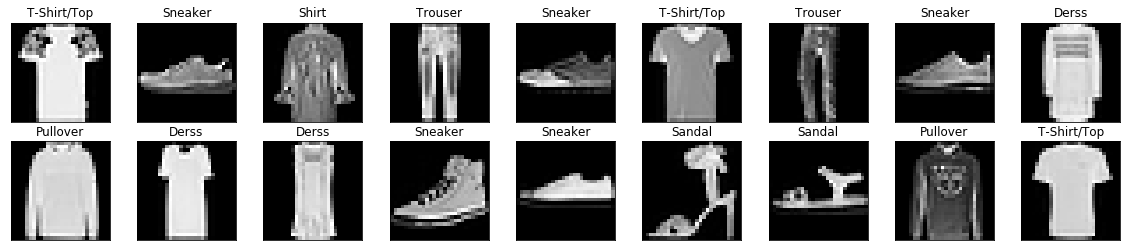

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(test_loader))
images = images.numpy()

fig = plt.figure(figsize=(20, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap="gray")
    ax.set_title(classes[labels[idx]])

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # output = (width - filter)/stride + 1 = (28 - 3)/1 + 1 = 26
        self.conv1 = nn.Conv2d(1, 10, 3)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        # Second conv: 10 inputs, 20 outputs, 3x3 conv
        # output = (13 - 3)/1 + 1 = 11
        self.conv2 = nn.Conv2d(10, 20, 3)
        
        self.fc1 = nn.Linear(20*5*5, 50)
        
        self.fc1_drop = nn.Dropout(p=0.4)
        
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        # two conv/relu + pool
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # prep for linear (flatten)
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = self.fc2(x)
        
        return x

# Load in trained net

In [19]:
net = Net()
net.load_state_dict(torch.load("FMNIST/fashion_net_ex.pt"))
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


First convolutional layer


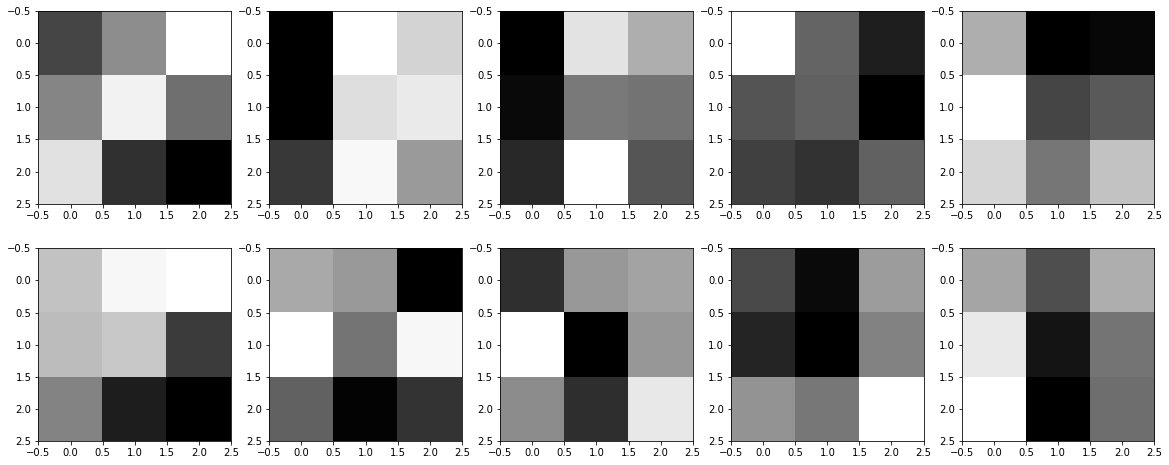

In [21]:
weights = net.conv1.weight.data
w = weights.numpy()

fig = plt.figure(figsize=(20, 8))
columns = 5
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(w[i][0], cmap="gray")

print("First convolutional layer")
plt.show()

weights = net.conv2.weight.data
w = weights.numpy()

# Activation maps

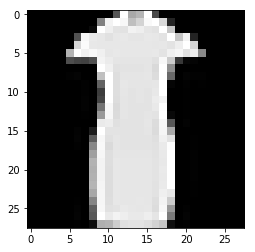

In [ ]:
images, labels = next(iter(test_loader))
images = images.numpy()

idx = 9
img = np.squeeze(images[idx])

import cv2
plt.imshow(img, cmap="gray")

weights = net.conv1.weight.data
w = weights.numpy()
fig = plt.figure(figsize=(30, 10))
columns = 10
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if (i%2 == 0):
        plt.imshow(w[int(i/2)][0], cmap="gray")
    else:
        c = cv2.filter2D(img, -1, w[int((i-1)/2)][0])
        plt.imshow(c, cmap="gray")
plt.show()